In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
All_Cpx['MgnoCpx']=(All_Cpx['MgO_Cpx']/40.4044)/((All_Cpx['MgO_Cpx']/40.4044)+(All_Cpx['FeOt_Cpx']/71.844))
Baker_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Baker"]
Baker_Cpx['Sample_ID_Cpx']="Baker"



C:\Users\penny\AppData\Local\Temp\ipykernel_31048\1772207997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Cpx['Sample_ID_Cpx']="Baker"


Text(0, 0.5, 'Cpx Pressure (Jorg)')

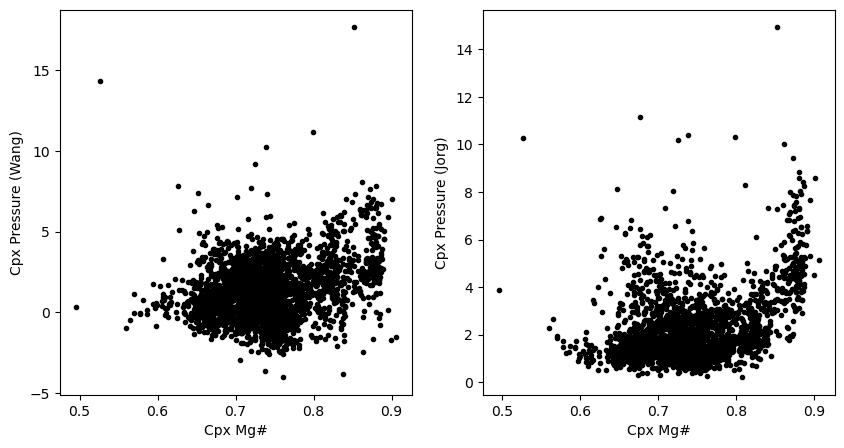

In [3]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(All_Cpx['MgnoCpx'], All_Cpx['P_Wang21_eq1'], '.k')
ax2.plot(All_Cpx['MgnoCpx'], All_Cpx['P_Jorgenson22'], '.k')

ax1.set_ylabel('Cpx Pressure (Wang)')
ax1.set_xlabel('Cpx Mg#')
ax2.set_xlabel('Cpx Mg#')
ax2.set_ylabel('Cpx Pressure (Jorg)')

In [4]:
len(Baker_Cpx)

230

In [5]:
WangCopy=Baker_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Baker_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)
Combo_Cpx['Sample_ID_Cpx']="Baker"

Combo_Cpx['MgnoCpx']=(Combo_Cpx['MgO_Cpx']/40.4044)/((Combo_Cpx['MgO_Cpx']/40.4044)+(Combo_Cpx['FeOt_Cpx']/71.844))

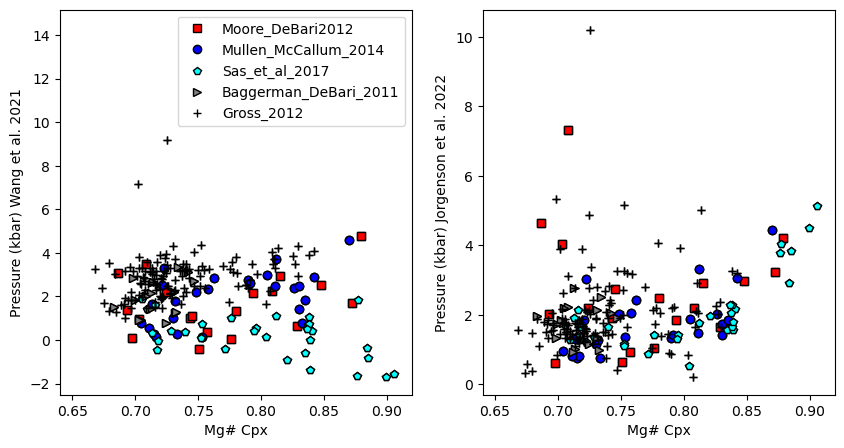

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)
color=['red', 'blue', 'cyan', 'grey']
shape=['s', 'o', 'p', '>']
i=0
for ref in Combo_Cpx['Reference'].unique():
    study=Combo_Cpx['Reference']==ref

    
    if ref!='Gross_2012':
        ax1.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Wang21_eq1'].loc[study], shape[i], mec='k', mfc=color[i], label=ref)
        ax2.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Jorgenson22'].loc[study], shape[i], mec='k',mfc=color[i], label=ref)
    
    else:
        ax1.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Wang21_eq1'].loc[study], '+k', mfc='None', label=ref)
        ax2.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Jorgenson22'].loc[study], '+k', label=ref)

    i=i+1
ax1.legend()
ax1.set_xlabel('Mg# Cpx')
ax1.set_ylabel('Pressure (kbar) Wang et al. 2021')

ax2.set_xlabel('Mg# Cpx')
ax2.set_ylabel('Pressure (kbar) Jorgenson et al. 2022')
ax1.set_xlim([0.64, 0.92])
fig.savefig('Baker_Cpx_Chemistry.png', dpi=200)

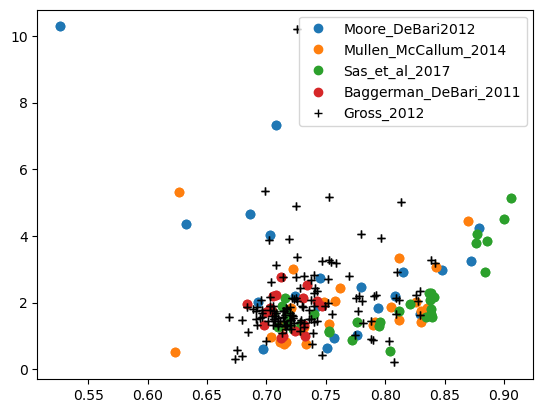

In [7]:
for ref in Combo_Cpx['Reference'].unique():
    study=Combo_Cpx['Reference']==ref

    
    if ref!='Gross_2012':
        plt.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Jorgenson22'].loc[study], 'o', label=ref)
    
    else:
        plt.plot(Combo_Cpx['MgnoCpx'].loc[study], Combo_Cpx['P_Jorgenson22'].loc[study], '+k', mfc='None', label=ref)
plt.legend()

In [8]:
study=Combo_Cpx['Reference']=='Gross_2012'
print(np.median(Combo_Cpx['P_Jorgenson22'].loc[study]))
print(np.median(Combo_Cpx['P_Wang21_eq1'].loc[study]))

1.7429738805970139
2.9317456009387755


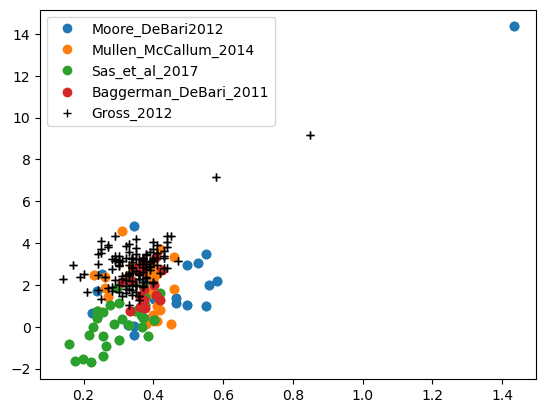

In [9]:
for ref in Combo_Cpx['Reference'].unique():
    study=Combo_Cpx['Reference']==ref

    
    if ref!='Gross_2012':
        plt.plot(Combo_Cpx['Na2O_Cpx'].loc[study], Combo_Cpx['P_Wang21_eq1'].loc[study], 'o', label=ref)
    
    else:
        plt.plot(Combo_Cpx['Na2O_Cpx'].loc[study], Combo_Cpx['P_Wang21_eq1'].loc[study], '+k', mfc='None', label=ref)
plt.legend()

## Choose Crustal density

In [10]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


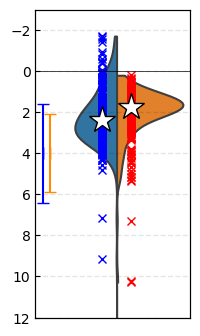

In [18]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Baker', 'Baker', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Baker"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]),  
         '*k', mfc='w', ms=20)



ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.45, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('Baker_Cpx.png', dpi=200)

In [12]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]))

2.4020207628418078


In [13]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Baker")]))

1.757351990049751


## Amphibole

C:\Users\penny\AppData\Local\Temp\ipykernel_31048\531365023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Amp['Sample_ID_Amp']="Baker"
C:\Users\penny\AppData\Local\Temp\ipykernel_31048\531365023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baker_Amp_Filt['Sample_ID_Amp']="Baker"
C:\Users\penny\AppData\Local\Temp\ipykernel_31048\531365023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

10
10


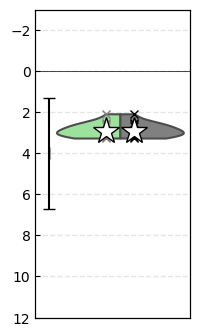

In [20]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
All_Amp['MgnoAmp']=(All_Amp['MgO_Amp']/40.4044)/((All_Amp['MgO_Amp']/40.4044)+(All_Amp['FeOt_Amp']/71.844))
Baker_Amp=All_Amp.loc[All_Amp['Volcano']=="Baker"]
Baker_Amp['Sample_ID_Amp']="Baker"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Baker_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Baker"]
Baker_Amp_Filt['Sample_ID_Amp']="Baker"
Baker_Amp['Class']='Unfilt'
Baker_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Baker_Amp_Filt, Baker_Amp], axis=0)

print(sum(Baker_Amp['P_kbar_calc']>-10))
print(sum(Baker_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Baker_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Baker_Amp_Filt['P_Ridolfi21'],
  Baker_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Baker_Amp['P_Ridolfi21'],
  Baker_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Baker_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Baker_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.6, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')


fig.savefig('Baker_Amp.png', dpi=200)

## Along arc trends in composition for Judy

In [15]:
AmpT=pt.calculate_amp_only_temp(amp_comps=All_Amp.reset_index(drop=True), equationT='T_Ridolfi2012', P=All_Amp['P_Ridolfi21']);
AmpT.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:912: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Sum_input = myAmps1_label.sum(axis='columns')


0    1213.209751
1    1216.414488
2    1233.596380
3    1191.485944
4    1224.088686
dtype: float64

In [16]:
AmpT['T_K_calc'].unique()

KeyError: 'T_K_calc'

Text(0, 0.5, 'CalcP')

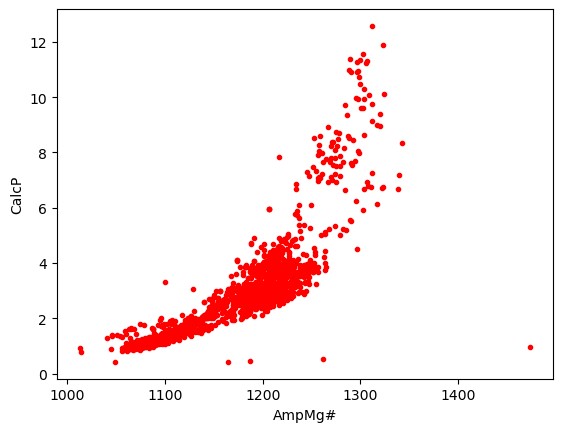

In [ ]:
#plt.plot(All_Amp['MgnoAmp'], All_Amp['P_Ridolfi21'], '.r')
plt.plot(AmpT,  All_Amp['P_Ridolfi21'], '.r')
plt.xlabel('AmpMg#')
plt.ylabel('CalcP')

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Baker_Amp)
Amp_Chem

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2352: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  norm_cations.loc[(Si_Al_less8), 'Al_IV_T']=norm_cations['Al_Amp_13_cat']
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2356: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2397: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_cations['Sum_input'] = myAmps1_label.sum(axis='columns')
g:\

,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,FeO_Eq7_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,...,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,63.111366,62.964849,63.477210,0.770492,3.831804,1.148677,5.070666,3.601477,2.899137,2.762952,...,0.838183,0.000000,0,0.027498,0.024731,1.720649,0.227122,0.460706,0.113610,3.683984
1,62.649984,61.782995,63.163781,0.760672,4.031021,1.139925,4.766926,3.522748,3.008784,2.938470,...,0.969980,0.000000,0,0.043106,0.025049,1.742796,0.189048,0.524835,0.111299,3.694910
2,60.134696,59.565878,58.850360,0.890364,5.114879,1.783957,5.766210,4.417966,2.428344,2.617921,...,0.759917,0.012343,0,0.000000,0.000000,1.764393,0.235607,0.549874,0.089237,5.036635
3,64.894925,63.710308,66.471848,0.532625,3.236624,0.882584,3.973185,3.160694,2.957379,2.808432,...,0.986664,0.000000,0,0.105207,0.037209,1.741566,0.116018,0.559704,0.099010,2.741396
4,61.606431,61.462449,58.464645,0.843264,4.616254,2.013602,6.676842,4.699047,2.041934,2.341330,...,0.527099,0.000000,0,0.016984,0.024755,1.784942,0.173318,0.450009,0.083891,4.887146
5,63.023637,62.179682,63.507562,0.702579,3.963220,1.147774,4.837781,3.575393,2.843418,2.771340,...,0.909291,0.000000,0,0.069304,0.024936,1.734925,0.170834,0.514139,0.114552,3.586748
6,62.935797,62.776803,61.223728,0.787480,4.036277,1.433405,5.685296,4.029827,2.554164,2.681625,...,0.744396,0.004909,0,0.000000,0.019561,1.764363,0.216076,0.444875,0.092138,4.183200
7,60.258437,59.707279,58.064868,0.862260,4.997630,2.121717,6.393293,4.852289,2.068968,2.339351,...,0.597230,0.000000,0,0.018243,0.000000,1.789670,0.192087,0.529479,0.106544,5.002347
8,62.666212,62.487535,61.792846,0.879661,3.962685,1.401391,5.760134,3.986013,2.677610,2.698539,...,0.729773,0.000000,0,0.017671,0.024640,1.745453,0.212236,0.427926,0.109478,4.037633
9,59.551731,58.074526,58.314025,0.974191,5.332151,2.010492,6.121082,4.605099,2.310498,2.582174,...,0.735023,0.000000,0,0.066609,0.025109,1.778736,0.129545,0.574553,0.092656,4.967912


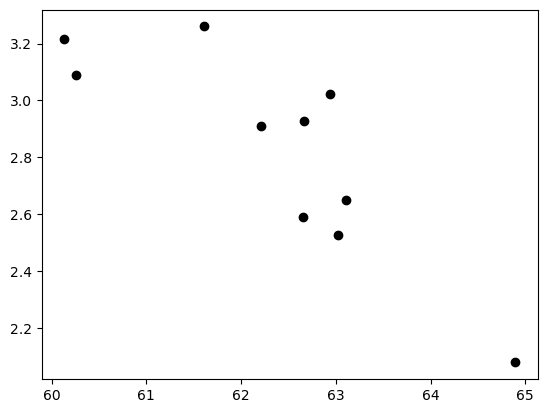

In [ ]:
plt.plot(Amp_Chem['SiO2_Eq1_Zhang17'], Baker_Amp['P_Ridolfi21'], 'ok' )

In [ ]:
Amp_Chem_all=pt.calculate_amp_only_melt_comps(amp_comps=All_Amp)
Amp_Chem_all

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2352: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  norm_cations.loc[(Si_Al_less8), 'Al_IV_T']=norm_cations['Al_Amp_13_cat']
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2356: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  norm_cations.loc[(Si_Al_sites_less8), 'Ti_T']=8-norm_cations['Si_T']-norm_cations['Al_IV_T']
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2389: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  norm_cations.loc[(Ca_greaterthanNa), 'Na_B']=norm_cations['Na_Amp_13_cat']
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer

,SiO2_Eq1_Zhang17,SiO2_Eq2_Zhang17,SiO2_Eq4_Zhang17,TiO2_Eq6_Zhang17,FeO_Eq7_Zhang17,MgO_Eq9_Zhang17,CaO_Eq10_Zhang17,CaO_Eq11_Zhang17,K2O_Eq12_Zhang17,K2O_Eq13_Zhang17,...,Fe2_C_ideal,Mn_C_ideal,Mg_B_ideal,Fe2_B_ideal,Mn_B_ideal,Ca_B_ideal,Na_B_ideal,Na_A_ideal,K_A_ideal,FeO_Eq8_Zhang17
0,63.111366,62.964849,63.477210,0.770492,3.831804,1.148677,5.070666,3.601477,2.899137,2.762952,...,0.838183,0.000000,0,0.027498,0.024731,1.720649,0.227122,0.460706,0.113610,3.683984
1,62.649984,61.782995,63.163781,0.760672,4.031021,1.139925,4.766926,3.522748,3.008784,2.938470,...,0.969980,0.000000,0,0.043106,0.025049,1.742796,0.189048,0.524835,0.111299,3.694910
2,60.134696,59.565878,58.850360,0.890364,5.114879,1.783957,5.766210,4.417966,2.428344,2.617921,...,0.759917,0.012343,0,0.000000,0.000000,1.764393,0.235607,0.549874,0.089237,5.036635
3,64.894925,63.710308,66.471848,0.532625,3.236624,0.882584,3.973185,3.160694,2.957379,2.808432,...,0.986664,0.000000,0,0.105207,0.037209,1.741566,0.116018,0.559704,0.099010,2.741396
4,61.606431,61.462449,58.464645,0.843264,4.616254,2.013602,6.676842,4.699047,2.041934,2.341330,...,0.527099,0.000000,0,0.016984,0.024755,1.784942,0.173318,0.450009,0.083891,4.887146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,65.608507,66.503183,66.423875,0.397066,3.583059,0.898522,3.559528,3.985053,2.148512,2.054899,...,0.830605,0.037235,0,0.000000,0.000000,1.643854,0.356146,0.425911,0.085469,3.589945
2441,111.197809,110.973930,94.341886,0.014299,0.024390,0.032442,-2.604096,0.658404,6.719673,6.861719,...,1.565408,0.082192,0,0.000000,0.000000,2.904683,0.000000,0.092492,0.008675,0.056389
2442,97.967989,108.071146,90.169016,0.017600,0.038529,0.049351,-1.962280,0.780404,7.443727,6.035137,...,0.859177,0.083758,0,0.000000,0.000000,2.835839,0.000000,0.185991,0.023079,0.095307
2443,83.217679,84.670966,83.009172,0.112184,0.506300,0.165410,0.250432,1.781903,3.356379,3.358625,...,1.038076,0.054101,0,0.000000,0.000000,1.859900,0.140100,0.230534,0.059719,0.634231


Text(0, 0.5, 'P calc from Amp')

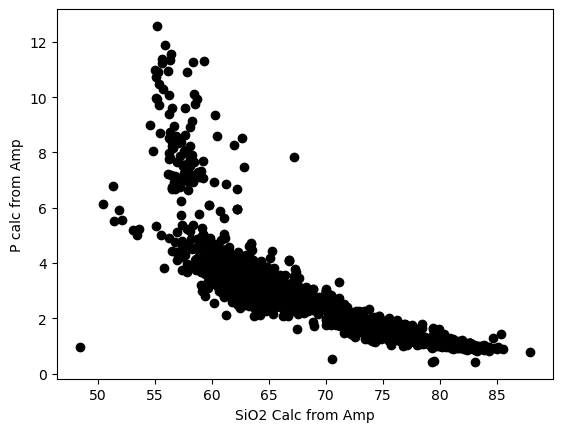

In [ ]:
plt.plot(Amp_Chem_all['SiO2_Eq2_Zhang17'], All_Amp['P_Ridolfi21'], 'ok' )
plt.xlabel('SiO2 Calc from Amp')
plt.ylabel('P calc from Amp')

In [ ]:
## Load in LP data

In [ ]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Baker=LPs.loc[LPs['Volcano']=="Mount Baker"]
LPs_Baker

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
23,Mount Baker,48.7767,25.105868,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
24,Mount Baker,48.7767,24.621900,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
25,Mount Baker,48.7767,22.686025,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
26,Mount Baker,48.7767,27.041742,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
27,Mount Baker,48.7767,27.949183,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
28,Mount Baker,48.7767,27.707199,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
29,Mount Baker,48.7767,27.888687,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
30,Mount Baker,48.7767,28.251664,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
31,Mount Baker,48.7767,22.383545,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
32,Mount Baker,48.7767,19.298246,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN


In [ ]:
LPs['Volcano'].unique()

array(['Lassen', 'Medicine Lake', 'Three sisters', 'Crater Lake',
       'Mount Baker', 'Glacier Peak', 'Mount Rainier'], dtype=object)

## Expet plot

## Raw template for geophysics and Exp Pet

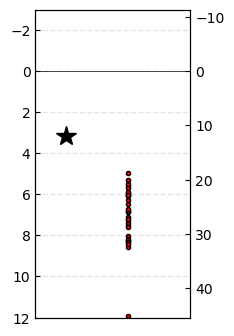

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches

av_stat_level=2.000
summit_height=3.2876
dif=summit_height-av_stat_level
## Hodge and Crider - GPS.
ax2.plot(0, 5.8+dif, 12, '*k', mfc='black', ms=15)

ax2.plot(LPs_Baker['Depth']*0+0.6, LPs_Baker['Depth']+summit_height, 'ok', mfc='red', ms=3)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.3, 1.2])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophy_Baker.png', dpi=200, bbox_inches="tight")

In [ ]:
av_stat_level=2.000
summit_height=3.2876
dif=summit_height-av_stat_level

In [ ]:
5.8+dif

7.0876